"""
Fashion MNIST CNN Comparison: Keras vs PyTorch
This script builds and trains the same CNN architecture using both frameworks
"""

In [1]:
# ============================================================================
# IMPORTS
# ============================================================================
# Keras/TensorFlow imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# PyTorch imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision
from torchvision import transforms

# Common imports
import numpy as np
import matplotlib.pyplot as plt
import time

print("=" * 80)
print("FASHION MNIST CNN: KERAS vs PYTORCH COMPARISON")
print("=" * 80)

FASHION MNIST CNN: KERAS vs PYTORCH COMPARISON


In [2]:
# ============================================================================
# LOAD DATA
# ============================================================================
print("\n[1] Loading Fashion MNIST dataset...")

# Load for Keras
(x_train_keras, y_train_keras), (x_test_keras, y_test_keras) = keras.datasets.fashion_mnist.load_data()
x_train_keras = x_train_keras.astype('float32') / 255.0
x_test_keras = x_test_keras.astype('float32') / 255.0
x_train_keras = x_train_keras.reshape(-1, 28, 28, 1)
x_test_keras = x_test_keras.reshape(-1, 28, 28, 1)

# Load for PyTorch
transform = transforms.Compose([transforms.ToTensor()])
train_dataset_pt = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset_pt = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader_pt = DataLoader(train_dataset_pt, batch_size=128, shuffle=True)
test_loader_pt = DataLoader(test_dataset_pt, batch_size=128, shuffle=False)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Training samples: {len(x_train_keras)}")
print(f"Test samples: {len(x_test_keras)}")


[1] Loading Fashion MNIST dataset...
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


100%|██████████| 26.4M/26.4M [00:02<00:00, 11.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 211kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.93MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.7MB/s]

Training samples: 60000
Test samples: 10000


In [3]:
# ============================================================================
# BUILD KERAS MODEL
# ============================================================================
print("\n[2] Building Keras CNN Model...")

keras_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

keras_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Keras Model Architecture:")
keras_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



[2] Building Keras CNN Model...
Keras Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# ============================================================================
# BUILD PYTORCH MODEL
# ============================================================================
print("\n[3] Building PyTorch CNN Model...")

class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=0)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=0)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=0)
        self.relu3 = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 3 * 3, 64)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.relu3(self.conv3(x))
        x = self.flatten(x)
        x = self.dropout(self.relu4(self.fc1(x)))
        x = self.fc2(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
pytorch_model = FashionCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer_pt = optim.Adam(pytorch_model.parameters(), lr=0.001)

print(f"PyTorch Model (Device: {device})")
print(pytorch_model)



[3] Building PyTorch CNN Model...
PyTorch Model (Device: cuda)
FashionCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu3): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=576, out_features=64, bias=True)
  (relu4): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [5]:

# ============================================================================
# TRAIN KERAS MODEL
# ============================================================================
print("\n[4] Training Keras Model...")
start_time = time.time()

keras_history = keras_model.fit(
    x_train_keras, y_train_keras,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

keras_train_time = time.time() - start_time
keras_test_loss, keras_test_acc = keras_model.evaluate(x_test_keras, y_test_keras, verbose=0)

print(f"\nKeras Training Time: {keras_train_time:.2f} seconds")
print(f"Keras Test Accuracy: {keras_test_acc:.4f}")


[4] Training Keras Model...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.5773 - loss: 1.1893 - val_accuracy: 0.8193 - val_loss: 0.4785
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7954 - loss: 0.5652 - val_accuracy: 0.8503 - val_loss: 0.3952
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8302 - loss: 0.4692 - val_accuracy: 0.8643 - val_loss: 0.3656
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8511 - loss: 0.4193 - val_accuracy: 0.8750 - val_loss: 0.3305
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8633 - loss: 0.3881 - val_accuracy: 0.8837 - val_loss: 0.3106
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8729 - loss: 0.3622 - val_accuracy: 0.8828 - val_loss: 0.3108
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8776 - loss: 0.3429 - val_accuracy: 0.8897 - val_loss: 0.2968
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8847 - 

In [6]:
# ============================================================================
# TRAIN PYTORCH MODEL
# ============================================================================
print("\n[5] Training PyTorch Model...")

def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    return running_loss / len(loader), 100 * correct / total

def evaluate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return running_loss / len(loader), 100 * correct / total

start_time = time.time()
pytorch_train_losses, pytorch_train_accs = [], []
pytorch_test_losses, pytorch_test_accs = [], []

for epoch in range(10):
    train_loss, train_acc = train_epoch(pytorch_model, train_loader_pt, criterion, optimizer_pt, device)
    test_loss, test_acc = evaluate(pytorch_model, test_loader_pt, criterion, device)
    pytorch_train_losses.append(train_loss)
    pytorch_train_accs.append(train_acc)
    pytorch_test_losses.append(test_loss)
    pytorch_test_accs.append(test_acc)
    print(f"Epoch [{epoch+1}/10] Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

pytorch_train_time = time.time() - start_time
pytorch_test_acc = pytorch_test_accs[-1]

print(f"\nPyTorch Training Time: {pytorch_train_time:.2f} seconds")
print(f"PyTorch Test Accuracy: {pytorch_test_acc:.2f}%")


[5] Training PyTorch Model...
Epoch [1/10] Train Loss: 0.8772, Train Acc: 67.44% | Test Loss: 0.5681, Test Acc: 77.17%
Epoch [2/10] Train Loss: 0.5773, Train Acc: 78.29% | Test Loss: 0.4697, Test Acc: 81.26%
Epoch [3/10] Train Loss: 0.5029, Train Acc: 81.50% | Test Loss: 0.4245, Test Acc: 84.36%
Epoch [4/10] Train Loss: 0.4481, Train Acc: 83.83% | Test Loss: 0.3895, Test Acc: 85.07%
Epoch [5/10] Train Loss: 0.4093, Train Acc: 85.42% | Test Loss: 0.3493, Test Acc: 87.35%
Epoch [6/10] Train Loss: 0.3803, Train Acc: 86.47% | Test Loss: 0.3310, Test Acc: 88.02%
Epoch [7/10] Train Loss: 0.3542, Train Acc: 87.47% | Test Loss: 0.3370, Test Acc: 87.50%
Epoch [8/10] Train Loss: 0.3390, Train Acc: 88.11% | Test Loss: 0.3135, Test Acc: 88.60%
Epoch [9/10] Train Loss: 0.3212, Train Acc: 88.64% | Test Loss: 0.2902, Test Acc: 89.75%
Epoch [10/10] Train Loss: 0.3066, Train Acc: 89.14% | Test Loss: 0.2989, Test Acc: 89.54%

PyTorch Training Time: 97.34 seconds
PyTorch Test Accuracy: 89.54%



COMPARISON RESULTS

Metric                         Keras                PyTorch             
----------------------------------------------------------------------
Test Accuracy                  89.99%               89.54%
Training Time (seconds)        32.51                 97.34
Time per Epoch (seconds)       3.25                 9.73

[6] Generating comparison plots...


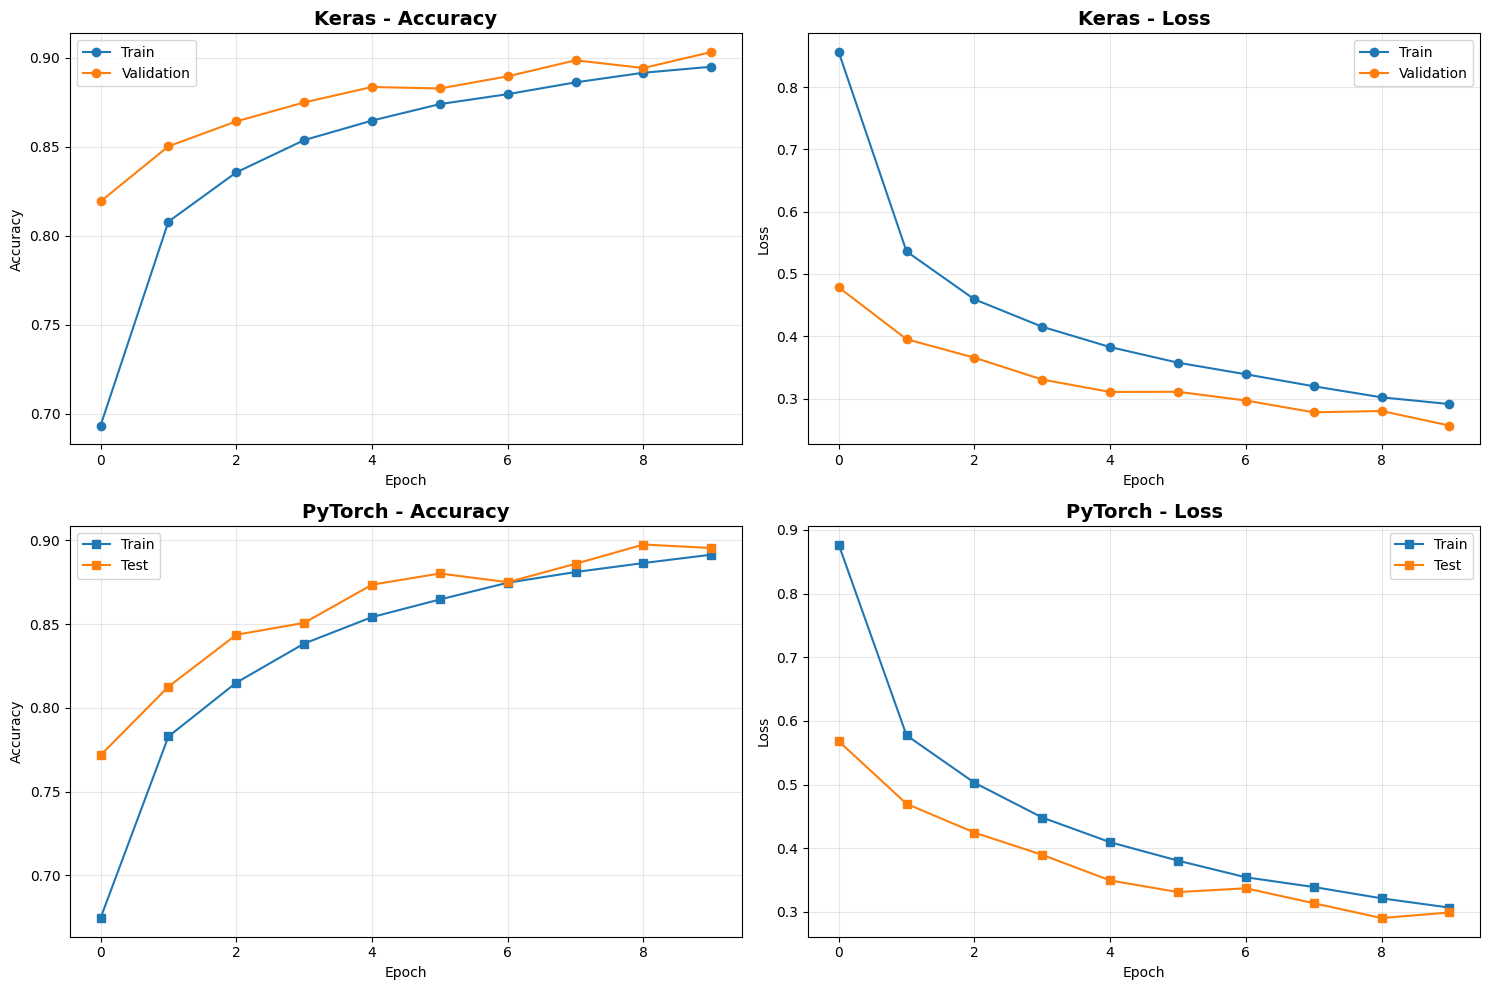

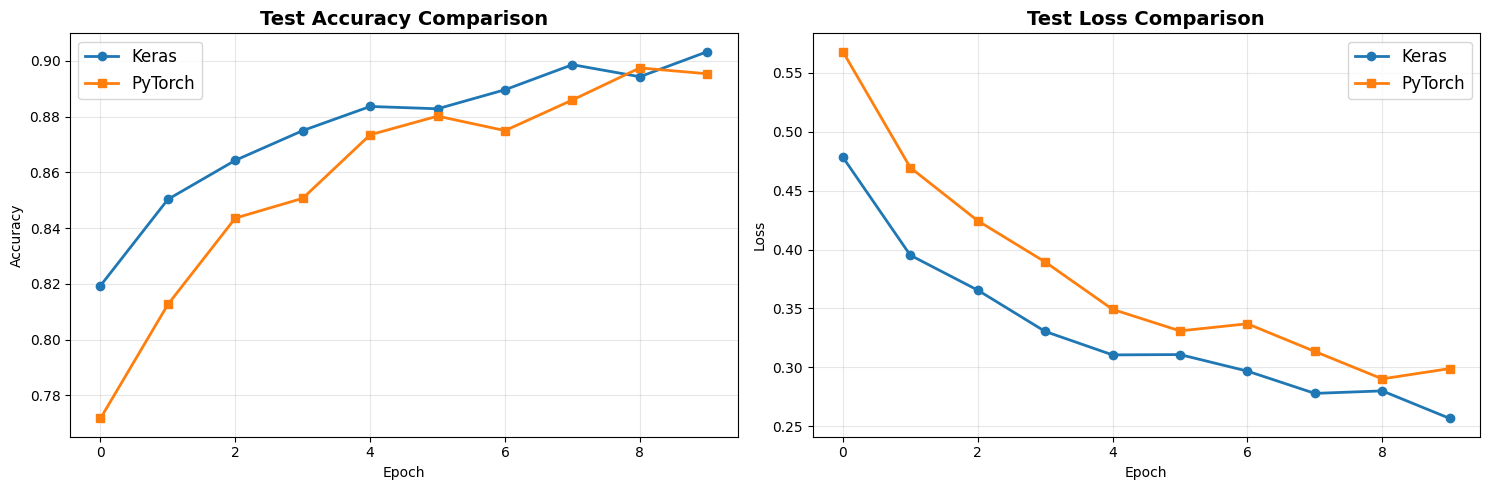


TRAINING COMPLETE - Both models trained and compared successfully!


In [7]:
# ============================================================================
# COMPARISON RESULTS
# ============================================================================
print("\n" + "=" * 80)
print("COMPARISON RESULTS")
print("=" * 80)
print(f"\n{'Metric':<30} {'Keras':<20} {'PyTorch':<20}")
print("-" * 70)
print(f"{'Test Accuracy':<30} {keras_test_acc*100:.2f}%{'':<14} {pytorch_test_acc:.2f}%")
print(f"{'Training Time (seconds)':<30} {keras_train_time:.2f}{'':<16} {pytorch_train_time:.2f}")
print(f"{'Time per Epoch (seconds)':<30} {keras_train_time/10:.2f}{'':<16} {pytorch_train_time/10:.2f}")

# ============================================================================
# VISUALIZATION
# ============================================================================
print("\n[6] Generating comparison plots...")

# Convert PyTorch accuracies to match Keras format (0-1 scale)
pytorch_train_accs_scaled = [acc/100 for acc in pytorch_train_accs]
pytorch_test_accs_scaled = [acc/100 for acc in pytorch_test_accs]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Keras Training History
axes[0, 0].plot(keras_history.history['accuracy'], label='Train', marker='o')
axes[0, 0].plot(keras_history.history['val_accuracy'], label='Validation', marker='o')
axes[0, 0].set_title('Keras - Accuracy', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(keras_history.history['loss'], label='Train', marker='o')
axes[0, 1].plot(keras_history.history['val_loss'], label='Validation', marker='o')
axes[0, 1].set_title('Keras - Loss', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# PyTorch Training History
axes[1, 0].plot(pytorch_train_accs_scaled, label='Train', marker='s')
axes[1, 0].plot(pytorch_test_accs_scaled, label='Test', marker='s')
axes[1, 0].set_title('PyTorch - Accuracy', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(pytorch_train_losses, label='Train', marker='s')
axes[1, 1].plot(pytorch_test_losses, label='Test', marker='s')
axes[1, 1].set_title('PyTorch - Loss', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('keras_vs_pytorch_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy Comparison
axes[0].plot(keras_history.history['val_accuracy'], label='Keras', marker='o', linewidth=2)
axes[0].plot(pytorch_test_accs_scaled, label='PyTorch', marker='s', linewidth=2)
axes[0].set_title('Test Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(fontsize=12)
axes[0].grid(True, alpha=0.3)

# Loss Comparison
axes[1].plot(keras_history.history['val_loss'], label='Keras', marker='o', linewidth=2)
axes[1].plot(pytorch_test_losses, label='PyTorch', marker='s', linewidth=2)
axes[1].set_title('Test Loss Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('direct_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "=" * 80)
print("TRAINING COMPLETE - Both models trained and compared successfully!")
print("=" * 80)